In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

file_path = '/Users/miteshwandhare/Downloads/air+quality/AirQualityUCI.xlsx'

# Read data 
df = pd.read_excel(file_path)

print(df.head())
m = df.shape
print(m)

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

   CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6      1360.00       150  11.881723        1045.50    166.0   
1     2.0      1292.25       112   9.397165         954.75    103.0   
2     2.2      1402.00        88   8.997817         939.25    131.0   
3     2.2      1375.50        80   9.228796         948.25    172.0   
4     1.6      1272.25        51   6.518224         835.50    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T         RH  \
0       1056.25    113.0       1692.00      1267.50  13.60  48.875001   
1       1173.75     92.0       1558.75       972.25  13.30  47.700000   
2       1140.00    114.0       1554.50      1074.00  11.90  53.975000   
3       1092.00    122.0       1583.75      1203.25  11.00  60.000000   
4       1205.00    116.0       1490.00      1110.00  11.15  59.575001   

         AH  
0  0.757754  
1  0.725487  
2  0.750239  
3  0.786713  
4  0.788794  
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)    

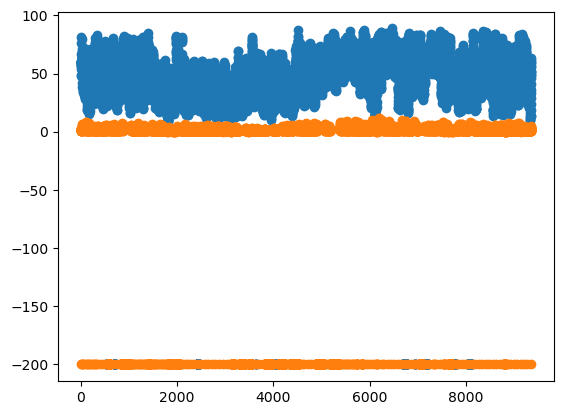

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Drop non-numeric columns
df = df.drop(columns=non_numeric_cols)
print(df.head())

#Visualising values
plt.plot(df.index,df['RH'],marker = 'o',linestyle='None')
plt.plot(df.index,df['CO(GT)'],marker = 'o',linestyle='None')

#Checking for nan values
print(df.isna().sum())


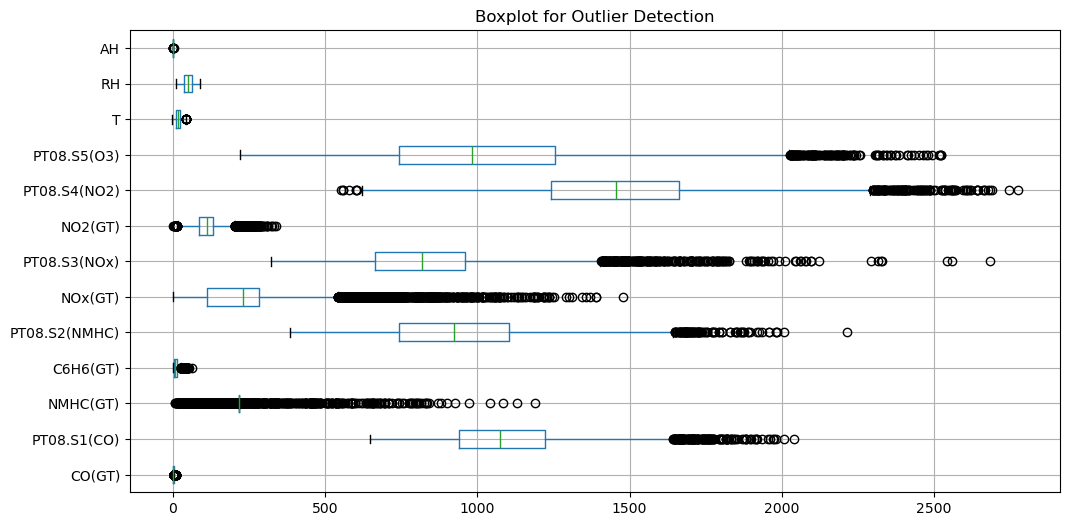

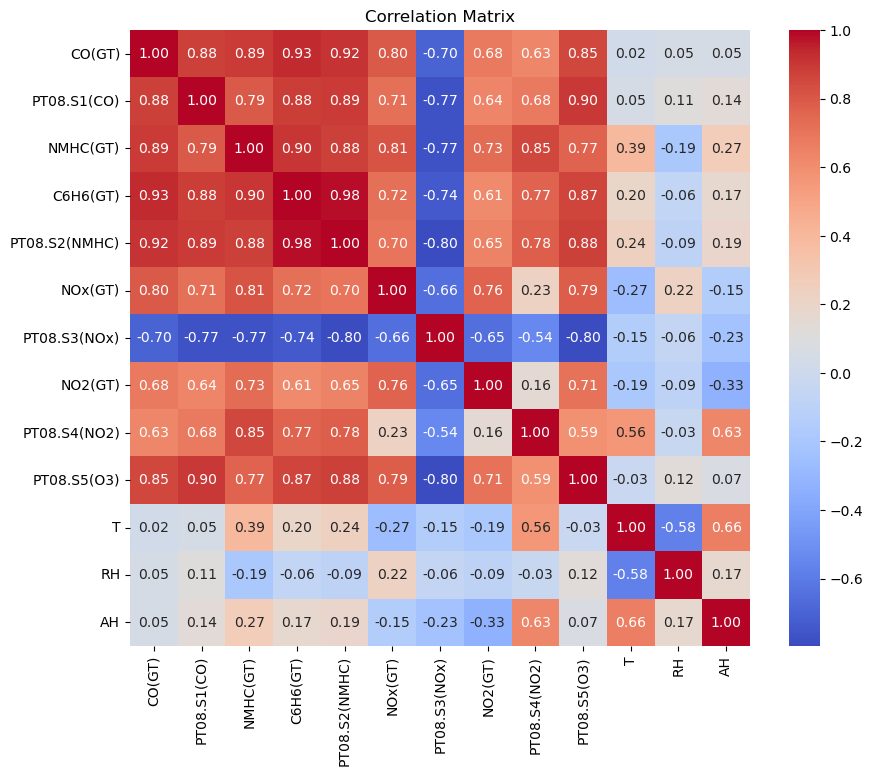

0       48.875001
1       47.700000
2       53.975000
3       60.000000
4       59.575001
          ...    
9352    29.250000
9353    23.725000
9354    18.350000
9355    13.550000
9356    13.125000
Name: RH, Length: 9357, dtype: float64


In [3]:
# Handle missing values mapped as -200
df.replace(-200, np.nan, inplace=True)
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Use box plots to identify outliers
plt.figure(figsize=(12, 6))
df_imputed.boxplot(vert=False)
plt.title("Boxplot for Outlier Detection")
plt.show()

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Identify and remove outliers using Z-score
from scipy.stats import zscore
z_scores = zscore(df_imputed)
outliers_mask = (np.abs(z_scores) < 3).all(axis=1)
df_no_outliers = df_imputed[outliers_mask]

print(df['RH'])

In [4]:
# Split the dataset into training and test sets
X = df_no_outliers.drop("RH", axis=1)
y = df_no_outliers["RH"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(X_test.head())
print(y_test.head())

      CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
7794     1.1       872.50  218.811816   2.357412     609.750000    139.3   
6308     2.3      1136.25  218.811816   8.153993     905.500000    346.0   
8748     0.9       983.50  218.811816   3.478433     681.000000    223.8   
9210     2.4      1202.00  218.811816  12.078789    1052.333333    295.9   
1295     3.9      1491.00  218.811816  23.554158    1392.000000    190.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)          T        AH  
7794       1050.75    101.7        818.75       527.00   3.625000  0.367390  
6308        728.50    120.0       1274.00      1140.25  12.625000  0.920861  
8748        851.75    100.7       1020.00       970.00   5.300000  0.657684  
9210        519.00    134.4       1525.00      1126.00  18.133333  1.201282  
1295        629.50    128.0       2149.00      1473.25  26.400000  1.172355  
7794    45.849999
6308    63.225000
8748    73.225000
9210    58.266666
129

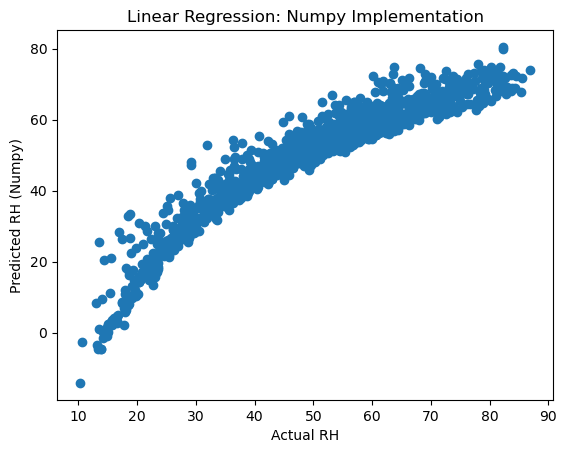

In [5]:
# Train a Linear Regression model using Numpy, Pandas, and Matplotlib
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
weights = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
predictions_np = X_test_bias.dot(weights)

# Plot results for Numpy
plt.scatter(y_test, predictions_np)
plt.xlabel("Actual RH")
plt.ylabel("Predicted RH (Numpy)")
plt.title("Linear Regression: Numpy Implementation")
plt.show()


Numpy R2 Score: 0.8817178506657978
Numpy Mean Squared Error: 33.11750201244189

Sklearn R2 Score: 0.8817178506657577
Sklearn Mean Squared Error: 33.11750201245311


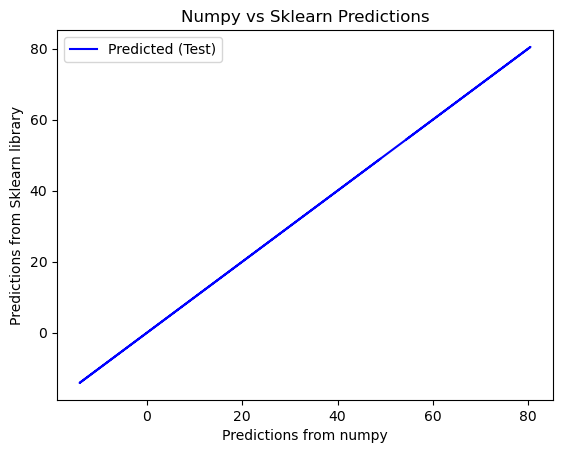

In [6]:
# Train a Linear Regression model using sklearn
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
predictions_sklearn = model_sklearn.predict(X_test)

# Calculate R2 score and Mean Squared Error for Numpy
r2_np = r2_score(y_test, predictions_np)
mse_np = mean_squared_error(y_test, predictions_np)

# Calculate R2 score and Mean Squared Error for sklearn
r2_sklearn = r2_score(y_test, predictions_sklearn)
mse_sklearn = mean_squared_error(y_test, predictions_sklearn)

# Compare results
print("Numpy R2 Score:", r2_np)
print("Numpy Mean Squared Error:", mse_np)
print("\nSklearn R2 Score:", r2_sklearn)
print("Sklearn Mean Squared Error:", mse_sklearn)


plt.plot(predictions_np, predictions_sklearn , color='blue', label='Predicted (Test)')
plt.xlabel("Predictions from numpy")
plt.ylabel("Predictions from Sklearn library")
plt.title("Numpy vs Sklearn Predictions")
plt.legend()
plt.show()